In [124]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error,mean_absolute_error

from xgboost import XGBClassifier


### Read the xls file and convert to csv 

In [209]:
df = pd.read_excel('credit_card_clients.xls')

In [210]:
df.to_csv ('credit_card_clients.csv', index = False, header=None)

In [2]:
df = pd.read_csv('credit_card_clients.csv', index_col=0 )

In [4]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
1         -2  ...          0          0          0         0       689   
2          0  ...       3272       3455       3261         0      1000   
3          0  ...      14331      14948      15549      1518      1500   
4          0  ...      28314      28959      29547      2000      2019   
5          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...      88004      31237      15980      8500     20000   
29997      0  ...       8979       5190          0      1837      3526   
29998      0  ...      20878      20582      19357         0         0   
29999      0  ...      52774      11855      48944     85900      3409   
30000      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
ID                                                                         
1             0         0         0         0                           1  
2          1000      1000         0      2000                           1  
3          1000      1000      1000      5000                           0  
4          1200      1100      1069      1000                           0  
5         10000      9000       689       679                           0  
...         ...       ...       ...       ...                         ...  
29996      5003      3047      5000      1000                           0  
29997      8998       129         0         0                           0  
29998     22000      4200      2000      3100                           1  
29999      1178      1926     52964      1804                           1  
30000      1430      1000      1000      1000                           1  

[30000 rows x 24 columns]

In [3]:
# Rename last column 
# Lets replace "default payment next month" as Y and "PAY_0" as PAY_1 for consistency
df = df.rename(columns={'default payment next month': 'Y'})
df = df.rename(columns={'PAY_0': 'PAY_1'})


In [4]:
df

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1          2         1   46      0      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
1         -2  ...          0          0          0         0       689   
2          0  ...       3272       3455       3261         0      1000   
3          0  ...      14331      14948      15549      1518      1500   
4          0  ...      28314      28959      29547      2000      2019   
5          0  ...      20940      19146      19131      2000     36681   
...      ...  ...        ...        ...        ...       ...       ...   
29996      0  ...      88004      31237      15980      8500     20000   
29997      0  ...       8979       5190          0      1837      3526   
29998      0  ...      20878      20582      19357         0         0   
29999      0  ...      52774      11855      48944     85900      3409   
30000      0  ...      36535      32428      15313      2078      1800   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Y  
ID                                                
1             0         0         0         0  1  
2          1000      1000         0      2000  1  
3          1000      1000      1000      5000  0  
4          1200      1100      1069      1000  0  
5         10000      9000       689       679  0  
...         ...       ...       ...       ... ..  
29996      5003      3047      5000      1000  0  
29997      8998       129         0         0  0  
29998     22000      4200      2000      3100  1  
29999      1178      1926     52964      1804  1  
30000      1430      1000      1000      1000  1  

[30000 rows x 24 columns]

# Lets understand the data

In [ ]:
There are 25 variables

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_1: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [6]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_1         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6             Y  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 24 columns]

In [7]:
df.isna().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

In [8]:
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Y            0
dtype: int64

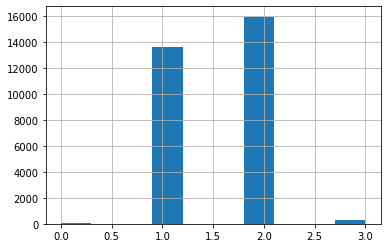

In [11]:
df.MARRIAGE.hist()

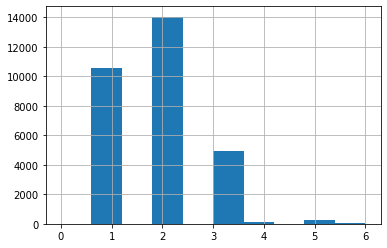

In [10]:
df.EDUCATION.hist()

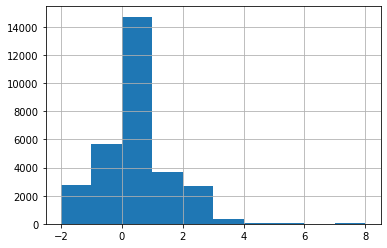

In [4]:
df.PAY_1.hist()

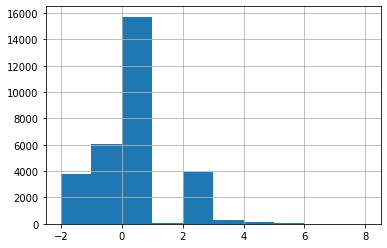

In [5]:
df.PAY_2.hist()

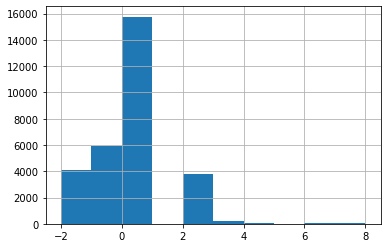

In [6]:
df.PAY_3.hist()

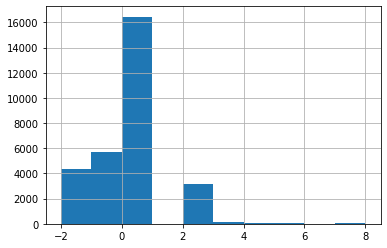

In [7]:
df.PAY_4.hist()

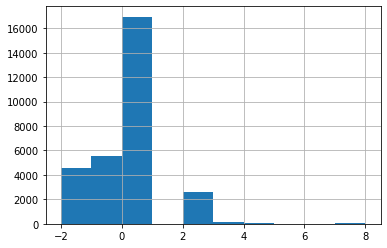

In [8]:
df.PAY_5.hist()

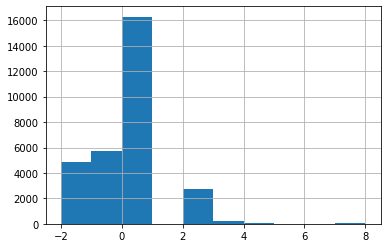

In [9]:
df.PAY_6.hist()

# First Impression about the data 
#### 1. PAY_1, PAY_2... PAY_6 has mentioned -1 to be duly payed but has -2 entry which is undefined
#### 2. EDUCATION  has two unknown columns and one others which can be combined
#### 3. MARRIAGE  has unknown value "0"

In [4]:
df['Y'].value_counts()

0    23364
1     6636
Name: Y, dtype: int64

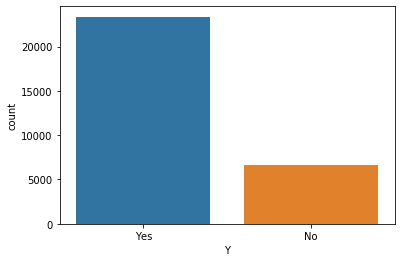

In [10]:
# visualize the target variable
g = sns.countplot(df['Y'])
g.set_xticklabels(['Yes','No'])
plt.show()

 ### OBSERVATION : The numer of default payment is significantly higher . We have to explore oversampling or undersampling in sometime 

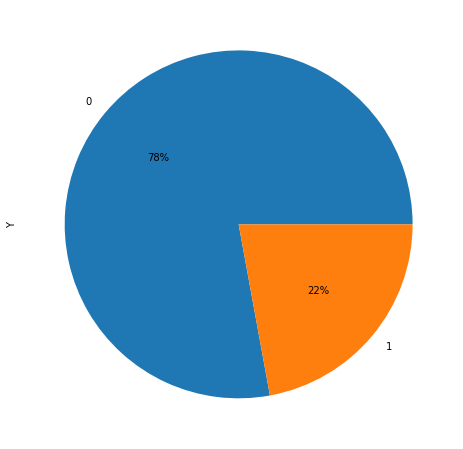

In [5]:
# TO check the percentage of default payment values
plt.figure(figsize=(16,8))
df.Y.value_counts().plot(kind='pie', autopct='%1.0f%%')


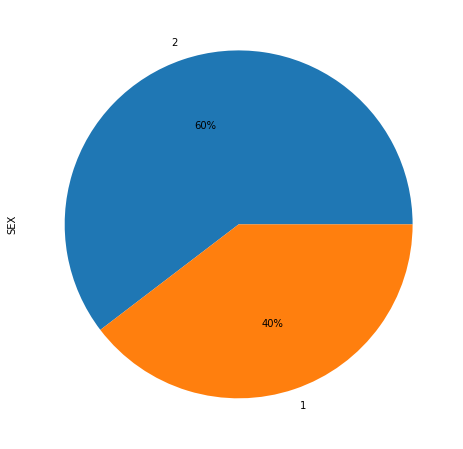

In [6]:
# To check the percentage of Male and Female
plt.figure(figsize=(16,8))
df.SEX.value_counts().plot(kind='pie', autopct='%1.0f%%')


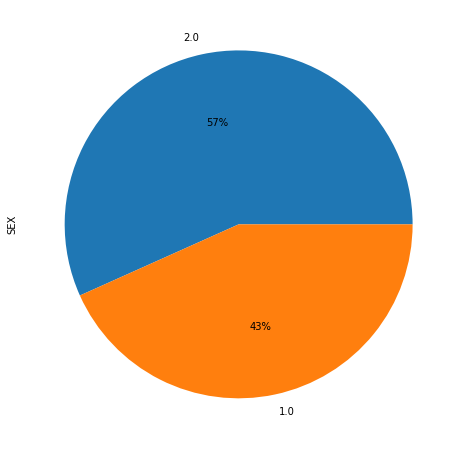

In [8]:
# To check Missed payments based on Sex of person
plt.figure(figsize=(16,8))
df.where(df["Y"]==1).SEX.value_counts().plot(kind='pie', autopct='%1.0f%%')



### OBSERVATION :  We see that women have missed the payment more than men but that cannot be applicable here as the data comprises of 60% women vs 40% men . Lets explore further in detail

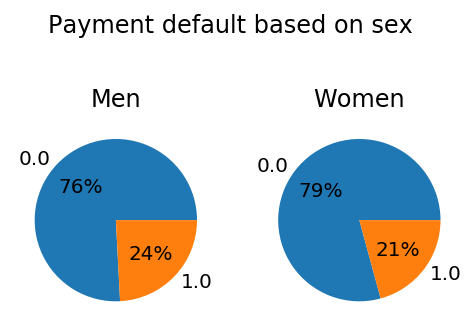

In [9]:
# Checking again after normalizing the values 
fig = plt.figure(figsize=(4,3),dpi=144)
ax1 = fig.add_subplot(121)
plt.suptitle("Payment default based on sex")
count = df.where(df["SEX"]==1).Y.value_counts().to_frame().sort_index()
ax1.pie(count.Y, labels=count.index, autopct='%1.0f%%')
ax1.set_title("Men")
ax2 = fig.add_subplot(122)
count = df.where(df["SEX"]==2).Y.value_counts().to_frame().sort_index()
ax2.pie(count.Y, labels=count.index, autopct='%1.0f%%')
ax2.set_title("Women")

plt.show()


### OBSERVATION :  Here we understand that men are  more likely to miss the payment as compared to women 

### Since EDUCATION and MARRIAGE fields have uknown data, let us first clean and visualise it in sometime

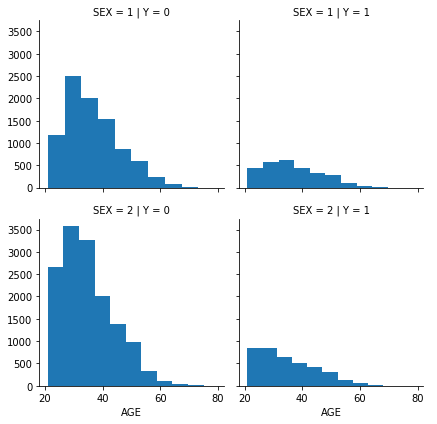

In [10]:
# To check the distribution of age and sex  on default payments
g = sns.FacetGrid(df, col = 'Y', row = 'SEX')
g.map(plt.hist, 'AGE').add_legend()

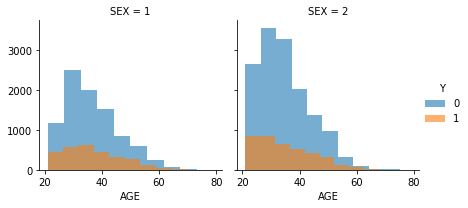

In [11]:
# To check the distribution of age and sex  on default payments
g = sns.FacetGrid(df, col='SEX', hue='Y')
g.map(plt.hist, 'AGE', alpha=0.6, bins=10) #alpha is for opacity
g.add_legend()

In [ ]:
After analysing the data we understand that the following colums are categorical data and numerical data 

Categorical data : SEX, EDUCATION, MARRIAGE, PAY_1, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6
Numerical Data  : LIMIT_BAL, AGE, BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6,
    PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6
    
Target : Y

# Data cleansing 

#### Education column has values 0,5 and 6 which are unknown . We will change the values to 4 "others".Marriage column has value 0 which means unknown . We will change it to 3 which is "others". Payment duely paid wihout delayed has been defined as -2 and -1 which we will change to 0 for better understanding


In [12]:
# Let us first check the values 
df_ed = df[df.iloc[:, 2].isin([0, 5, 6])] 

In [13]:
df_ed

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
48        150000    2          5         2   46      0      0     -1      0   
70         20000    1          5         2   22      2      0      0      0   
386       410000    2          5         1   42      0      0      0      0   
503       230000    2          6         2   46      0      0      0      0   
505        30000    1          6         1   53     -2     -2     -2     -2   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29812      50000    1          5         2   46      0      0      0     -1   
29837     180000    1          6         1   34     -2     -2     -2     -2   
29840     150000    1          5         1   36      0      0      0      0   
29921      50000    1          5         1   45      2      0      0      0   
29967     150000    1          5         2   31      2      0      0      0   

       PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
ID            ...                                                        
48         0  ...       1170          0          0      1013      1170   
70         0  ...      18085      11205       5982         0      1200   
386        0  ...     240865     234939     240176     15000     14000   
503        0  ...     186635     189896     193351     10000      9000   
505       -2  ...          0          0          0         0         0   
...      ...  ...        ...        ...        ...       ...       ...   
29812      0  ...      19183      19563      19157      1423      1000   
29837     -2  ...          0          0          0         0         0   
29840      0  ...     136378     139219     142172      5500      3800   
29921      0  ...      50947      51020          0      3000      3428   
29967     -2  ...          0          0          0      4633      2000   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  Y  
ID                                                
48            0         0         0         0  1  
70         1000       500      1000         0  0  
386        9000      8500      9000      8300  0  
503        8000      8000      7500      7000  0  
505           0         0         0         0  0  
...         ...       ...       ...       ... ..  
29812     19183       687       696       776  0  
29837         0         0         0         0  0  
29840      3900      4000      4100      4100  0  
29921      2002      1023         0         0  1  
29967         0         0         0         0  1  

[345 rows x 24 columns]

In [36]:
df[df.iloc[:, [2]].isin([0, 5, 6])] = 4 # Update  Education unknown values the values to 4 

In [37]:
df[df.iloc[:, [3]] == 0] = 3 # Update Marriage unknown values to 3

In [38]:
# Payment duely paid wihout delayed has been defined as -2 and -1 which we will change to 0 for better understanding
df[df.iloc[:, [5]].isin([-1, -2])] = 0
df[df.iloc[:, [6]].isin([-1, -2])] = 0
df[df.iloc[:, [7]].isin([-1, -2])] = 0
df[df.iloc[:, [8]].isin([-1, -2])] = 0
df[df.iloc[:, [9]].isin([-1, -2])] = 0
df[df.iloc[:, [10]].isin([-1, -2])] = 0

In [76]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.842267      1.557267     35.485500   
std     129747.661567      0.489129      0.744494      0.521405      9.217904   
min      10000.000000      1.000000      1.000000      1.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      4.000000      3.000000     79.000000   

              PAY_1         PAY_2         PAY_3         PAY_4        PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.00000   
mean       0.356767      0.320033      0.304067      0.258767      0.22150   
std        0.760594      0.801727      0.790589      0.761113      0.71772   
min        0.000000      0.000000      0.000000      0.000000      0.00000   
25%        0.000000      0.000000      0.000000      0.000000      0.00000   
50%        0.000000      0.000000      0.000000      0.000000      0.00000   
75%        0.000000      0.000000      0.000000      0.000000      0.00000   
max        8.000000      8.000000      8.000000      8.000000      8.00000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6             Y  
count   30000.000000  30000.000000  
mean     5215.502567      0.221200  
std     17777.465775      0.415062  
min         0.000000      0.000000  
25%       117.750000      0.000000  
50%      1500.000000      0.000000  
75%      4000.000000      0.000000  
max    528666.000000      1.000000  

[8 rows x 24 columns]

In [16]:
# Let us check the normalized marriage column values based on Y column 
new_df = df.groupby("MARRIAGE")["Y"].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()

(0, 100)

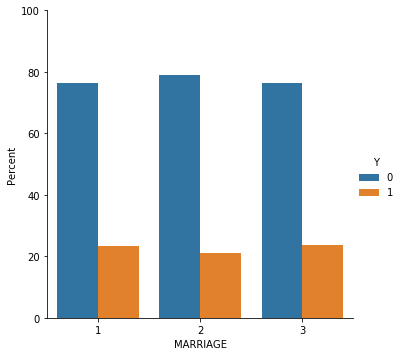

In [17]:
g = sns.catplot(x='MARRIAGE', y='Percent', hue="Y", kind='bar', data=new_df)
g.ax.set_ylim(0,100)

In [18]:
def percentage_plot(df, col, target):

    # Creates a temporary dataframe to get the percentages
    temp_df = df.groupby(col)['Y'].value_counts(normalize=True)
    temp_df = temp_df.mul(100).rename('Percent').reset_index()
    temp_df['Percent'] = temp_df['Percent'].round(decimals=1)

    # Plot the percentages with the temporary dataframe
    fig = px.bar(temp_df, x=col, y='Percent', color=target, 
                    barmode="group", text='Percent', title=f"Percent {target} By {col}")

    return fig

In [19]:
percentage_plot(df, "MARRIAGE", "Y")

### OBSERVATION :   Divorced, Widowed people are likely to miss the payment followed by married people

### Lets see the pairplot for the columns 

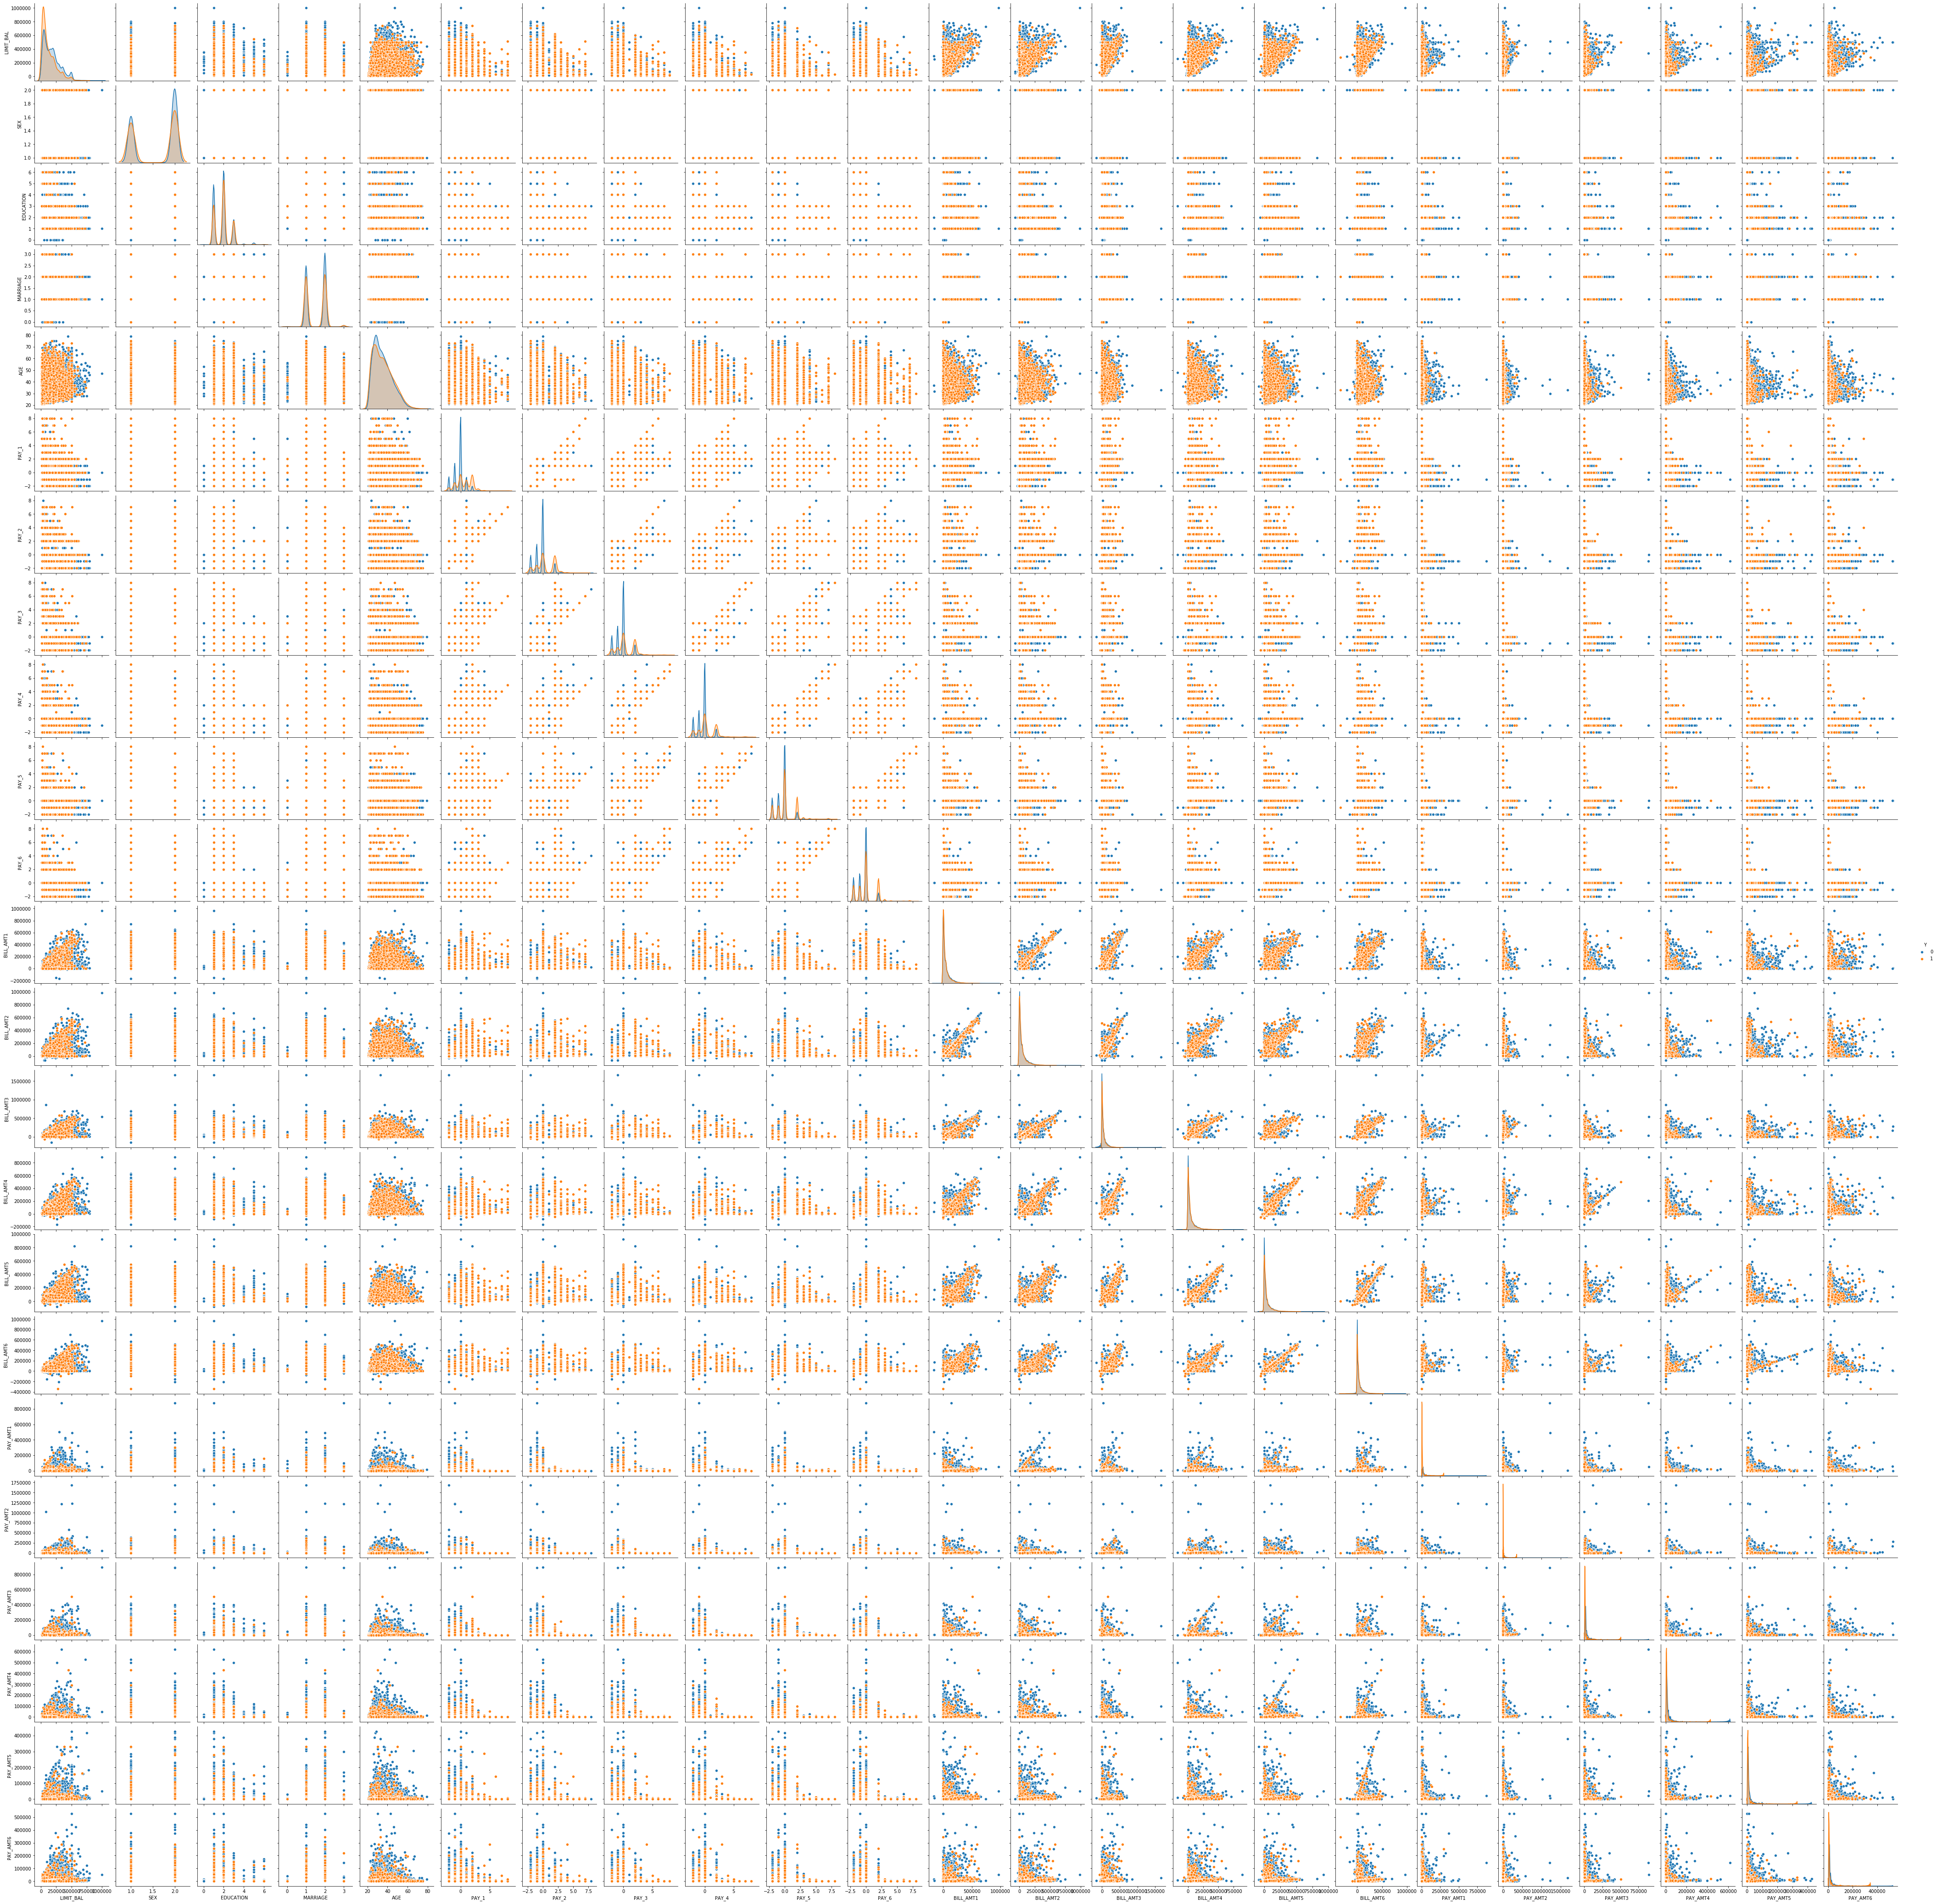

In [52]:
sns.pairplot(df, hue="Y")

### OBSERVATION : The data points are overlapping which means it is a non linear classification . We can consider Decision tree, Random forest, XGBoost, KNN to solve the problem

# Find the performance of the models with basic data updates

Let us find the model performance with basic data before feature engineering 

In [39]:
X = df.iloc[:, :-1]
y = df["Y"]

In [29]:
class Model:
    def __init__(self, X_train, X_test, y_train, y_test, model=None, yislog = "N"):
        self.yislog = yislog
        self.model = model
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test        

    
    def _evaluate_model(self, model):
        model.fit(self.X_train, np.log(y)) if self.yislog == 'Y' else  model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)

        if self.yislog == 'Y':
            y_pred = np.exp(y_pred)

        mse = mean_squared_error(self.y_test,y_pred)

        mae = mean_absolute_error(self.y_test,y_pred)

        #matrix = confusion_matrix(y, y_pred)
        #msle = mean_squared_log_error(y,predictions)
        accuracy = accuracy_score(y_true = self.y_test, y_pred = y_pred)
        print("Accuracy:", accuracy)
        precision = precision_score(y_true = self.y_test, y_pred = y_pred)
        print("Precision: ", precision)
        recall = recall_score(y_true = self.y_test, y_pred = y_pred)
        print("Recall: ", recall)
        f1 = f1_score(y_true = self.y_test, y_pred = y_pred)
        print("F1 Score: ", f1)
        
        #         mse = round(mse,2)

        #         mae = round(mae,2)
    
    def train_model(self):
        
        if self.model == 'svm':
            model = SVC(kernel="linear", C=0.025, verbose=True, random_state=42)
            print("----SVM Model-----")
            self._evaluate_model(model)
            
        elif self.model == 'lr':
            model = LogisticRegression()
            print("----Logistic Regression Model-----")
            self._evaluate_model(model)
        elif self.model == 'xg':
            model = XGBClassifier()
            print("----XGBoost Model-----")
            self._evaluate_model(model)
        elif self.model == 'rf':
            model = RandomForestClassifier()
            print("----Random Forest Model-----")
            self._evaluate_model(model)
        elif self.model == 'knn':
            model = KNeighborsClassifier(n_neighbors=15)
            print("----KNN Model-----")
            self._evaluate_model(model)
        else :
            # Logistic Regression is not needed for this dataset
            #             model = LogisticRegression()
            #             print("----Logistic Regression Model-----")
            #             self._evaluate_model(model)
            
            model = XGBClassifier()
            print("----XGBoost Model-----")
            self._evaluate_model(model)
            
            model = RandomForestClassifier()
            print("----Random Forest Model-----")
            self._evaluate_model(model)
            
            model = KNeighborsClassifier(n_neighbors=15)
            print("----KNN Model-----")
            self._evaluate_model(model)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [24]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [41]:
model = Model(X_train, X_test, y_train, y_test, 'C', )
model.train_model()

----XGBoost Model-----
[14:05:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 0.8128888888888889
Precision:  0.6232142857142857
Recall:  0.35612244897959183
F1 Score:  0.4532467532467533
----Random Forest Model-----
Accuracy: 0.8145555555555556
Precision:  0.6277436347673397
Recall:  0.3647959183673469
F1 Score:  0.46143917392707323
----KNN Model-----
Accuracy: 0.7717777777777778
Precision:  0.4123134328358209
Recall:  0.11275510204081633
F1 Score:  0.17708333333333334


### OBSERVATION : Accuracy is very high but Precision, recall and F1 score is very low . This is because of the vast difference between the size of data of the two classes . We can fix this by sampling and feature engineering

# Feature Engineering

#### Let us perform feature engineering and create new colums and see if the following have an impact on the model . For example, sex and marriage status can be combined to have a new column curr_status. Age can be binned into categories

In [42]:
cat_col = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
num_col = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [67]:
cat_df = df[cat_col]
num_df = df[num_col]


In [68]:
#Cut age in different bins
cat_df['AGE_BIN'] = pd.cut(x=cat_df['AGE'], bins=[20, 29, 39, 49,59, 69, 79, 89], labels=['1', '2', '3', '4', '5', '6', '7'])

C:\Users\PRINCY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
# convert column "AGE_BIN" of a DataFrame to numeric 
age_num = pd.to_numeric(cat_df.loc[:, "AGE_BIN"])
cat_df.loc[:,"AGE_BIN"] = age_num

In [78]:
cat_df

SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
ID                                                                        
1        2          2         1   24      2      2      0      0      0   
2        2          2         2   26      0      2      0      0      0   
3        2          2         2   34      0      0      0      0      0   
4        2          2         1   37      0      0      0      0      0   
5        1          2         1   57      0      0      0      0      0   
...    ...        ...       ...  ...    ...    ...    ...    ...    ...   
29996    1          3         1   39      0      0      0      0      0   
29997    1          3         2   43      0      0      0      0      0   
29998    1          2         2   37      4      3      2      0      0   
29999    1          3         1   41      1      0      0      0      0   
30000    1          2         1   46      0      0      0      0      0   

       PAY_6  AGE_BIN  
ID                     
1          0        1  
2          2        1  
3          0        2  
4          0        2  
5          0        4  
...      ...      ...  
29996      0        2  
29997      0        3  
29998      0        2  
29999      0        3  
30000      0        3  

[30000 rows x 11 columns]

In [79]:
# Scaling the Numerical values
scalar = StandardScaler()
num_df.loc[:,num_col] = scalar.fit_transform(num_df.loc[:,num_col])

C:\Users\PRINCY\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\PRINCY\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
num_df

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -1.136720  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
2      -0.365981  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
3      -0.597202  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
4      -0.905498  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
5      -0.905498  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   
...          ...        ...        ...        ...        ...        ...   
29996   0.404759   1.870379   2.018136   2.326690   0.695474  -0.149259   
29997  -0.134759  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691   
29998  -1.059646  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517   
29999  -0.674276  -0.717982   0.410269   0.422373   0.147844  -0.468063   
30000  -0.905498  -0.044739  -0.003851   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
ID                                                                            
1      -0.652724 -0.341942 -0.227086 -0.296801 -0.308063 -0.314136 -0.293382  
2      -0.597966 -0.341942 -0.213588 -0.240005 -0.244230 -0.314136 -0.180878  
3      -0.391630 -0.250292 -0.191887 -0.240005 -0.244230 -0.248683 -0.012122  
4      -0.156579 -0.221191 -0.169361 -0.228645 -0.237846 -0.244166 -0.237130  
5      -0.331482 -0.221191  1.335034  0.271165  0.266434 -0.269039 -0.255187  
...          ...       ...       ...       ...       ...       ...       ...  
29996  -0.384392  0.171250  0.611048 -0.012648 -0.113564  0.013131 -0.237130  
29997  -0.652724 -0.231032 -0.103955  0.214255 -0.299828 -0.314136 -0.293382  
29998  -0.327687 -0.341942 -0.256990  0.952725 -0.039964 -0.183229 -0.119001  
29999   0.169130  4.844316 -0.109033 -0.229895 -0.185120  3.152536 -0.191904  
30000  -0.395592 -0.216481 -0.178866 -0.215582 -0.244230 -0.248683 -0.237130  

[30000 rows x 13 columns]

In [80]:
df_encoded = pd.concat([num_df, cat_df],axis=1)

In [81]:
df_encoded

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -1.136720  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
2      -0.365981  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
3      -0.597202  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
4      -0.905498  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
5      -0.905498  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   
...          ...        ...        ...        ...        ...        ...   
29996   0.404759   1.870379   2.018136   2.326690   0.695474  -0.149259   
29997  -0.134759  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691   
29998  -1.059646  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517   
29999  -0.674276  -0.717982   0.410269   0.422373   0.147844  -0.468063   
30000  -0.905498  -0.044739  -0.003851   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  ...  EDUCATION  MARRIAGE  AGE  \
ID                                              ...                             
1      -0.652724 -0.341942 -0.227086 -0.296801  ...          2         1   24   
2      -0.597966 -0.341942 -0.213588 -0.240005  ...          2         2   26   
3      -0.391630 -0.250292 -0.191887 -0.240005  ...          2         2   34   
4      -0.156579 -0.221191 -0.169361 -0.228645  ...          2         1   37   
5      -0.331482 -0.221191  1.335034  0.271165  ...          2         1   57   
...          ...       ...       ...       ...  ...        ...       ...  ...   
29996  -0.384392  0.171250  0.611048 -0.012648  ...          3         1   39   
29997  -0.652724 -0.231032 -0.103955  0.214255  ...          3         2   43   
29998  -0.327687 -0.341942 -0.256990  0.952725  ...          2         2   37   
29999   0.169130  4.844316 -0.109033 -0.229895  ...          3         1   41   
30000  -0.395592 -0.216481 -0.178866 -0.215582  ...          2         1   46   

       PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  AGE_BIN  
ID                                                        
1          2      2      0      0      0      0        1  
2          0      2      0      0      0      2        1  
3          0      0      0      0      0      0        2  
4          0      0      0      0      0      0        2  
5          0      0      0      0      0      0        4  
...      ...    ...    ...    ...    ...    ...      ...  
29996      0      0      0      0      0      0        2  
29997      0      0      0      0      0      0        3  
29998      4      3      2      0      0      0        2  
29999      1      0      0      0      0      0        3  
30000      0      0      0      0      0      0        3  

[30000 rows x 24 columns]

In [82]:
df_encoded['STATUS'] = 0
df_encoded.loc[((df_encoded.SEX == 1) & (df_encoded.MARRIAGE == 1)) , 'STATUS'] = 1 #married man
df_encoded.loc[((df_encoded.SEX == 1) & (df_encoded.MARRIAGE == 2)) , 'STATUS'] = 2 #single man
df_encoded.loc[((df_encoded.SEX == 1) & (df_encoded.MARRIAGE == 3)) , 'STATUS'] = 3 #divorced or widowed man
df_encoded.loc[((df_encoded.SEX == 2) & (df_encoded.MARRIAGE == 1)) , 'STATUS'] = 4 #married woman
df_encoded.loc[((df_encoded.SEX == 2) & (df_encoded.MARRIAGE == 2)) , 'STATUS'] = 5 #single woman
df_encoded.loc[((df_encoded.SEX == 2) & (df_encoded.MARRIAGE == 3)) , 'STATUS'] = 6 #divorced or widowed woman


In [83]:
df_encoded

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -1.136720  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
2      -0.365981  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
3      -0.597202  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
4      -0.905498  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
5      -0.905498  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   
...          ...        ...        ...        ...        ...        ...   
29996   0.404759   1.870379   2.018136   2.326690   0.695474  -0.149259   
29997  -0.134759  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691   
29998  -1.059646  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517   
29999  -0.674276  -0.717982   0.410269   0.422373   0.147844  -0.468063   
30000  -0.905498  -0.044739  -0.003851   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  ...  MARRIAGE  AGE  PAY_1  \
ID                                              ...                         
1      -0.652724 -0.341942 -0.227086 -0.296801  ...         1   24      2   
2      -0.597966 -0.341942 -0.213588 -0.240005  ...         2   26      0   
3      -0.391630 -0.250292 -0.191887 -0.240005  ...         2   34      0   
4      -0.156579 -0.221191 -0.169361 -0.228645  ...         1   37      0   
5      -0.331482 -0.221191  1.335034  0.271165  ...         1   57      0   
...          ...       ...       ...       ...  ...       ...  ...    ...   
29996  -0.384392  0.171250  0.611048 -0.012648  ...         1   39      0   
29997  -0.652724 -0.231032 -0.103955  0.214255  ...         2   43      0   
29998  -0.327687 -0.341942 -0.256990  0.952725  ...         2   37      4   
29999   0.169130  4.844316 -0.109033 -0.229895  ...         1   41      1   
30000  -0.395592 -0.216481 -0.178866 -0.215582  ...         1   46      0   

       PAY_2  PAY_3  PAY_4  PAY_5  PAY_6  AGE_BIN  STATUS  
ID                                                         
1          2      0      0      0      0        1       4  
2          2      0      0      0      2        1       5  
3          0      0      0      0      0        2       5  
4          0      0      0      0      0        2       4  
5          0      0      0      0      0        4       1  
...      ...    ...    ...    ...    ...      ...     ...  
29996      0      0      0      0      0        2       1  
29997      0      0      0      0      0        3       2  
29998      3      2      0      0      0        2       2  
29999      0      0      0      0      0        3       1  
30000      0      0      0      0      0        3       1  

[30000 rows x 25 columns]

In [84]:
df_updated = pd.concat([df_encoded, df["Y"]],axis=1)

In [85]:
df_updated

LIMIT_BAL  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
ID                                                                        
1      -1.136720  -0.642501  -0.647399  -0.667993  -0.672497  -0.663059   
2      -0.365981  -0.659219  -0.666747  -0.639254  -0.621636  -0.606229   
3      -0.597202  -0.298560  -0.493899  -0.482408  -0.449730  -0.417188   
4      -0.905498  -0.057491  -0.013293   0.032846  -0.232373  -0.186729   
5      -0.905498  -0.578618  -0.611318  -0.161189  -0.346997  -0.348137   
...          ...        ...        ...        ...        ...        ...   
29996   0.404759   1.870379   2.018136   2.326690   0.695474  -0.149259   
29997  -0.134759  -0.672786  -0.665299  -0.627430  -0.532924  -0.577691   
29998  -1.059646  -0.647227  -0.643830  -0.638158  -0.347961  -0.324517   
29999  -0.674276  -0.717982   0.410269   0.422373   0.147844  -0.468063   
30000  -0.905498  -0.044739  -0.003851   0.039667  -0.104582  -0.129669   

       BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  ...  AGE  PAY_1  PAY_2  PAY_3  \
ID                                              ...                             
1      -0.652724 -0.341942 -0.227086 -0.296801  ...   24      2      2      0   
2      -0.597966 -0.341942 -0.213588 -0.240005  ...   26      0      2      0   
3      -0.391630 -0.250292 -0.191887 -0.240005  ...   34      0      0      0   
4      -0.156579 -0.221191 -0.169361 -0.228645  ...   37      0      0      0   
5      -0.331482 -0.221191  1.335034  0.271165  ...   57      0      0      0   
...          ...       ...       ...       ...  ...  ...    ...    ...    ...   
29996  -0.384392  0.171250  0.611048 -0.012648  ...   39      0      0      0   
29997  -0.652724 -0.231032 -0.103955  0.214255  ...   43      0      0      0   
29998  -0.327687 -0.341942 -0.256990  0.952725  ...   37      4      3      2   
29999   0.169130  4.844316 -0.109033 -0.229895  ...   41      1      0      0   
30000  -0.395592 -0.216481 -0.178866 -0.215582  ...   46      0      0      0   

       PAY_4  PAY_5  PAY_6  AGE_BIN  STATUS  Y  
ID                                              
1          0      0      0        1       4  1  
2          0      0      2        1       5  1  
3          0      0      0        2       5  0  
4          0      0      0        2       4  0  
5          0      0      0        4       1  0  
...      ...    ...    ...      ...     ... ..  
29996      0      0      0        2       1  0  
29997      0      0      0        3       2  0  
29998      0      0      0        2       2  1  
29999      0      0      0        3       1  1  
30000      0      0      0        3       1  1  

[30000 rows x 26 columns]

In [86]:
df_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 26 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   BILL_AMT1  30000 non-null  float64
 2   BILL_AMT2  30000 non-null  float64
 3   BILL_AMT3  30000 non-null  float64
 4   BILL_AMT4  30000 non-null  float64
 5   BILL_AMT5  30000 non-null  float64
 6   BILL_AMT6  30000 non-null  float64
 7   PAY_AMT1   30000 non-null  float64
 8   PAY_AMT2   30000 non-null  float64
 9   PAY_AMT3   30000 non-null  float64
 10  PAY_AMT4   30000 non-null  float64
 11  PAY_AMT5   30000 non-null  float64
 12  PAY_AMT6   30000 non-null  float64
 13  SEX        30000 non-null  int64  
 14  EDUCATION  30000 non-null  int64  
 15  MARRIAGE   30000 non-null  int64  
 16  AGE        30000 non-null  int64  
 17  PAY_1      30000 non-null  int64  
 18  PAY_2      30000 non-null  int64  
 19  PAY_3      30000 non-null  int64  
 20  PAY_4 

In [87]:
X = df_updated.iloc[:, :-1]
y = df_updated["Y"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [119]:
model = Model(X_train, X_test, y_train, y_test, 'C', )
model.train_model()

----XGBoost Model-----
[16:10:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 0.8143333333333334
Precision:  0.6244616709732989
Recall:  0.36989795918367346
F1 Score:  0.4645946811919256
----Random Forest Model-----
Accuracy: 0.8137777777777778
Precision:  0.6272401433691757
Recall:  0.35714285714285715
F1 Score:  0.45513654096228867
----KNN Model-----
Accuracy: 0.8052222222222222
Precision:  0.6180159635119726
Recall:  0.27653061224489794
F1 Score:  0.38209376101515685


### OBSERVATION : The values have improved slightly already 

# Feature Selection
#### Understanding which columns are important and which can be dropped

In [96]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

ExtraTreesClassifier()

In [97]:
print(model.feature_importances_)

[0.06542138 0.05160428 0.04783952 0.04626837 0.04620095 0.04528295
 0.04456967 0.04505758 0.04478507 0.04416432 0.04404347 0.04531416
 0.04671978 0.00644791 0.0304958  0.01168882 0.05954281 0.10168441
 0.03876295 0.02995289 0.01981108 0.02086888 0.02073669 0.02867457
 0.01406166]


In [98]:
ranked_features = pd.Series(model.feature_importances_, index=X_train.columns)

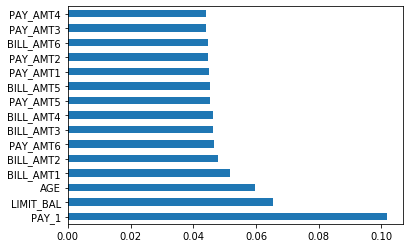

In [99]:
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

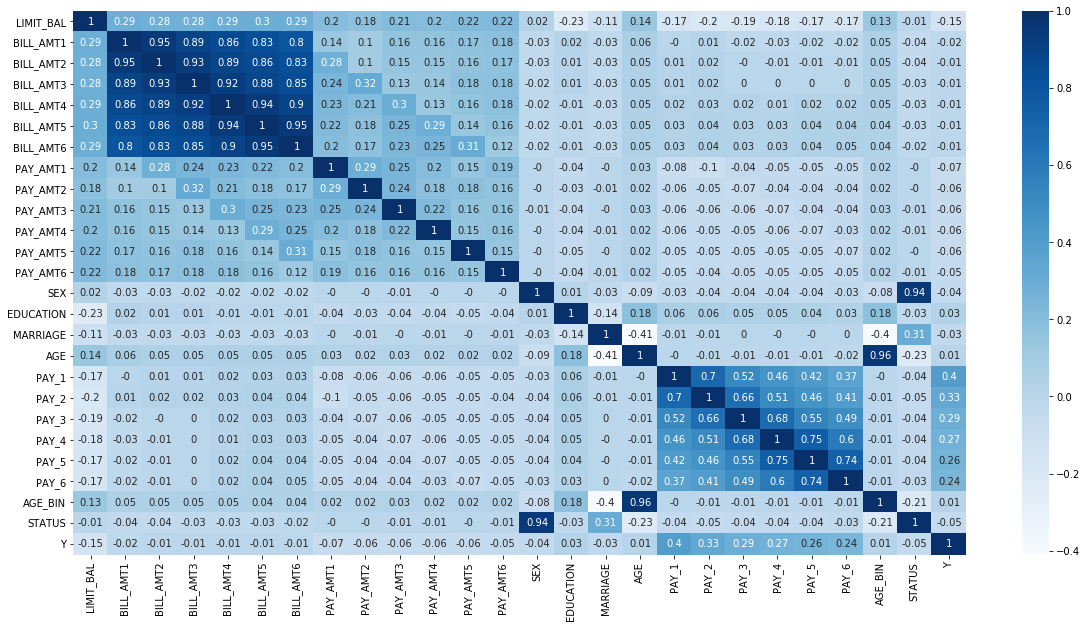

In [94]:
plt.figure(figsize=(20,10))

sns.heatmap(round(df_updated.corr(),2),annot=True,cmap="Blues");

In [95]:
#Function which provides highly corelated values in the  matrix 
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [102]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

7

In [103]:
corr_features


{'AGE_BIN',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'STATUS'}

In [104]:
mutual_info = mutual_info_classif(df_encoded, y)

In [105]:
mutual_features = pd.Series(mutual_info, index=df_encoded.columns)
mutual_features.sort_values(ascending=False)

PAY_1        0.072144
PAY_2        0.042202
PAY_3        0.036880
PAY_4        0.028862
PAY_5        0.028366
PAY_6        0.025341
PAY_AMT1     0.023400
PAY_AMT3     0.019183
LIMIT_BAL    0.017999
PAY_AMT2     0.016216
PAY_AMT4     0.014922
PAY_AMT5     0.013054
PAY_AMT6     0.010400
BILL_AMT1    0.010288
BILL_AMT5    0.007489
EDUCATION    0.007284
BILL_AMT2    0.006908
BILL_AMT3    0.006855
BILL_AMT6    0.005036
BILL_AMT4    0.004423
STATUS       0.003603
MARRIAGE     0.003344
AGE          0.002135
AGE_BIN      0.000612
SEX          0.000000
dtype: float64

### OBSERVATION : 'AGE_BIN', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'STATUS' has been observed to have been highly corealted with other columns making it duplicate columns which can be dropped . The Correlation matrix  showed that Sex which is highly corelated with Status but has low mutual info value with target . Similarly, Age Bin corelated with Age can be dropped along with BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6

In [120]:
X_train = X_train.drop(labels=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','AGE_BIN', 'SEX'], axis=1)
X_test = X_test.drop(labels=['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'AGE_BIN', 'SEX'], axis=1)


In [121]:
model = Model(X_train, X_test, y_train, y_test, 'C', )
model.train_model()

----XGBoost Model-----
[16:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 0.8114444444444444
Precision:  0.6200913242009133
Recall:  0.3464285714285714
F1 Score:  0.44451718494271686
----Random Forest Model-----
Accuracy: 0.8152222222222222
Precision:  0.6315323294951284
Recall:  0.3637755102040816
F1 Score:  0.46163807057300094
----KNN Model-----
Accuracy: 0.8063333333333333
Precision:  0.6165413533834586
Recall:  0.29285714285714287
F1 Score:  0.3970944309927361


## Oversampling Data 

In [122]:
smote = SMOTE()

# fit predictor and target variable
X_smote_train, y_smote_train = smote.fit_resample(X_train, y_train)

print('Original dataset shape', y_train.shape)
print('Resample dataset shape', y_smote_train.shape)

Original dataset shape (21000,)
Resample dataset shape (32648,)


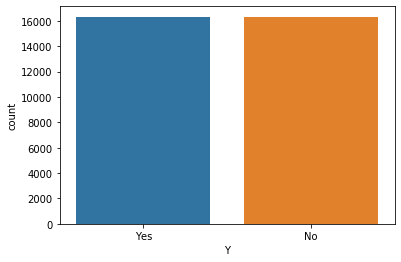

In [116]:
# Visualize the distribution of the two classes
g = sns.countplot(y_smote_train)
g.set_xticklabels(['Yes','No'])
plt.show()

In [123]:
model = Model(X_smote_train, X_test, y_smote_train, y_test, 'C', )
model.train_model()

----XGBoost Model-----
[16:18:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 0.7974444444444444
Precision:  0.5491039426523298
Recall:  0.39081632653061227
F1 Score:  0.4566318926974665
----Random Forest Model-----
Accuracy: 0.7836666666666666
Precision:  0.5035040431266846
Recall:  0.47653061224489796
F1 Score:  0.4896461336828309
----KNN Model-----
Accuracy: 0.6607777777777778
Precision:  0.3469616353962475
Recall:  0.6321428571428571
F1 Score:  0.4480202495028024


In [127]:
smotek = SMOTETomek(random_state=42)

# fit predictor and target variable
X_smotek_train, y_smotek_train = smotek.fit_resample(X_train, y_train)

In [128]:
model = Model(X_smotek_train, X_test, y_smotek_train, y_test, 'C', )
model.train_model()

----XGBoost Model-----
[16:37:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 0.7982222222222223
Precision:  0.549792531120332
Recall:  0.40561224489795916
F1 Score:  0.4668232530827951
----Random Forest Model-----
Accuracy: 0.7808888888888889
Precision:  0.4968051118210863
Recall:  0.4760204081632653
F1 Score:  0.4861907243355914
----KNN Model-----
Accuracy: 0.6658888888888889
Precision:  0.34961218040792874
Recall:  0.6209183673469387
F1 Score:  0.44734423819150887


In [129]:
smotenn = SMOTEENN(random_state=42)

# fit predictor and target variable
X_smotenn_train, y_smotenn_train = smotenn.fit_resample(X_train, y_train)
model = Model(X_smotenn_train, X_test, y_smotenn_train, y_test, 'C', )
model.train_model()

----XGBoost Model-----
[16:38:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PRINCY\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



Accuracy: 0.7731111111111111
Precision:  0.4818423383525244
Recall:  0.5551020408163265
F1 Score:  0.5158843053579896
----Random Forest Model-----
Accuracy: 0.7606666666666667
Precision:  0.46153846153846156
Recall:  0.5938775510204082
F1 Score:  0.5194109772423027
----KNN Model-----
Accuracy: 0.6382222222222222
Precision:  0.3352821555668531
Recall:  0.6729591836734694
F1 Score:  0.4475738038683407


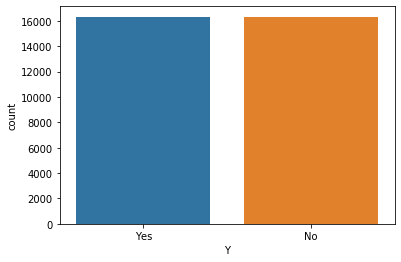

In [29]:
model_params = {
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [30]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_smote, y_smote)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

model  best_score           best_params
0        random_forest    0.845190  {'n_estimators': 90}
1  logistic_regression    0.670455             {'C': 10}

In [46]:
model_params['random_forest']['model']

RandomForestClassifier()

In [31]:
df

model  best_score           best_params
0        random_forest    0.845190  {'n_estimators': 90}
1  logistic_regression    0.670455             {'C': 10}